In [113]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from functools import reduce

In [114]:
# NEW PARAMETERS

# Controls
space_for_pet = 2
population_density_farmland = 2.5
population_density_suburban = 2500
population_density_urban = 4200

# Income Parameters
required_income_farmland = 60000
steepness_farmland = 0.00003

required_income_suburban = 100000
steepness_suburban = 0.00004

required_income_urban = 120000
steepness_urban = 0.00005



# Time Parameters
pet_time_requirement = 2
free_time_std = 1

# Space Parameters
floor_area_farmland = 300
outside_area_farmland = 10000

floor_area_suburban = 160
outside_area_suburban = 560

floor_area_urban = 80
outside_area_urban = 5



In [115]:
def get_income_index (income, required_income, steepness):
    return 1 / (1 + math.exp(-steepness*(income-required_income)))

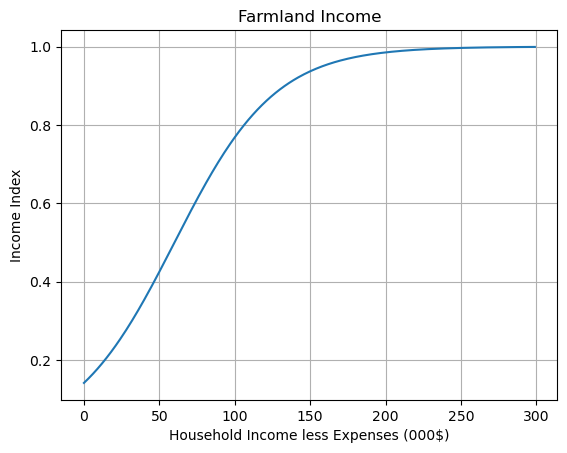

In [116]:
# measures whether a family is financially able to provide for a pet
# def get_income_index_FARMLAND(income, required_income = 60000, steepness = -0.00003):
    # return 1 / (1 + math.exp(steepness*(income-required_income)))

X = np.arange(0,300000, 1000)
Y = np.array([get_income_index(x, required_income_farmland, steepness_farmland) for x in X])

plt.grid()
plt.title("Farmland Income")
plt.xlabel("Household Income less Expenses (000$)")
plt.ylabel("Income Index")
plt.plot(X/1_000,Y)

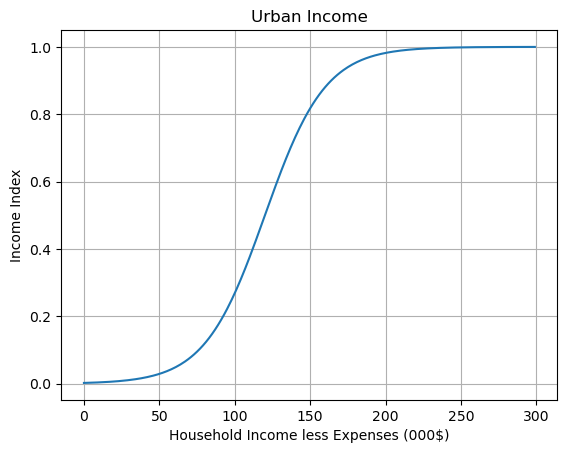

In [117]:
# measures whether an urban family is financially able to provide for a pet
# def get_income_index_URBAN(income, required_income = 100000, steepness = -0.00004):
  #  return 1 / (1 + math.exp(steepness*(income-required_income)))

X = np.arange(0,300_000, 1_000)
Y = np.array([get_income_index(x, required_income_urban, steepness_urban) for x in X])

plt.grid()
plt.title("Urban Income")
plt.xlabel("Household Income less Expenses (000$)")
plt.ylabel("Income Index")
plt.plot(X/1_000,Y)

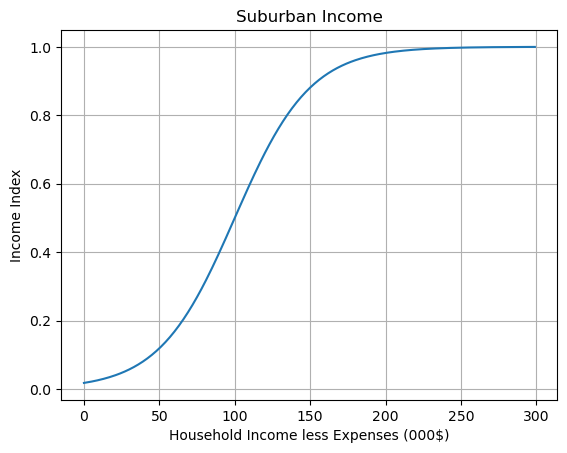

In [118]:
# measures whether a suburban family is financially able to provide for a pet
# def get_income_index_SUBURBAN(income, required_income = 120000, steepness = -0.000022):
  #  return 1 / (1 + math.exp(steepness*(income-required_income)))

X = np.arange(0,300_000, 1_000)
Y = np.array([get_income_index(x, required_income_suburban, steepness_suburban) for x in X])

plt.grid()
plt.title("Suburban Income")
plt.xlabel("Household Income less Expenses (000$)")
plt.ylabel("Income Index")
plt.plot(X/1_000,Y)

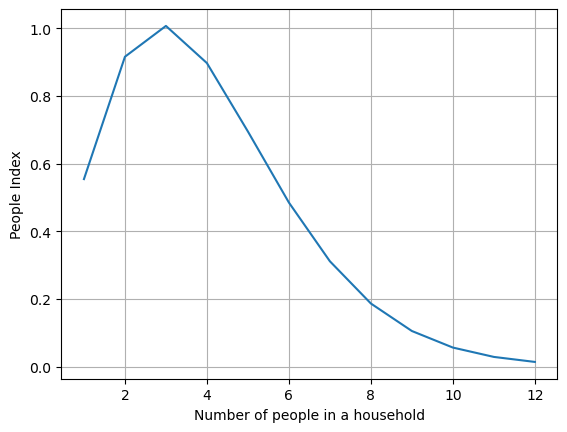

In [119]:
# measures whether there is sufficient space to fit a pet into the household
def get_people_index(number_of_people):
    # poisson distribution to obtain a suitable shape
    return 2 * math.exp(-0.7) * 0.7**(0.4*number_of_people-1) / math.gamma(0.4*number_of_people) 

# TODO:
# can convert to population densitry
# can do a hard cap on land area
# can do housing area in cases of ppl living on a farm

X = np.arange(1,13)
Y = np.array([get_people_index(x) for x in X])

plt.grid()
plt.xlabel("Number of people in a household")
plt.ylabel("People Index")
plt.plot(X,Y)

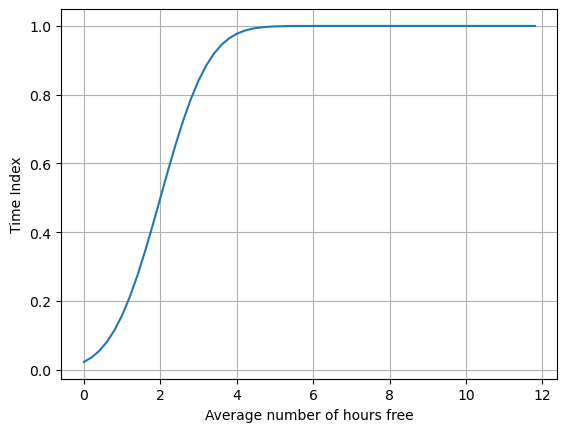

In [120]:
# measures whether someone has the time to take care of a pet
def get_time_index(owner_free_time, pet_time_requirement, free_time_std):
    z = (owner_free_time - pet_time_requirement) / free_time_std
    return norm.cdf(z)

X = np.arange(0, 12, 0.2)
Y = np.array([get_time_index(x, pet_time_requirement, free_time_std) for x in X])

plt.grid()
plt.xlabel("Average number of hours free")
plt.ylabel("Time Index")
plt.plot(X,Y)

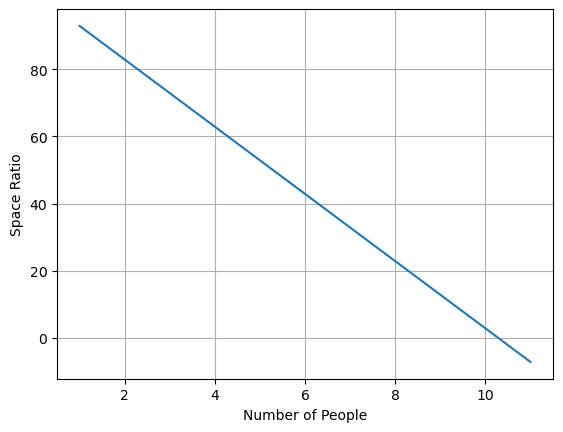

In [121]:
def get_space_ratio(floor_area, outside_area, people, space_for_pet, neccesary_space = 0, space_per_person = 20):
    human_space = 0.6 * floor_area + 10*math.log10(outside_area+1) - neccesary_space - space_per_person*people - space_for_pet
    # space = 0.6 * floor_area + 10 * math.log10(outside_area + 1) 
    space_ratio = human_space / space_for_pet

    return space_ratio

X = np.arange(1, 12, 1)
Y = np.array([get_space_ratio(300, 600, x, space_for_pet) for x in X])

plt.grid()
plt.xlabel("Number of People")
plt.ylabel("Space Ratio")
plt.plot(X,Y)

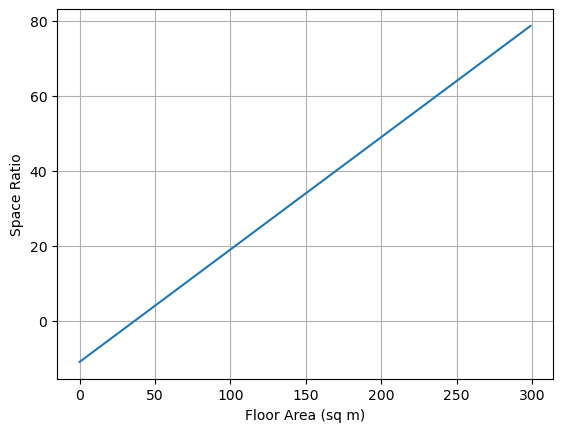

In [122]:
X = np.arange(0, 300, 1)
Y = np.array([get_space_ratio(x, 0, 1, space_for_pet) for x in X])

plt.grid()
plt.xlabel("Floor Area (sq m)")
plt.ylabel("Space Ratio")
plt.plot(X,Y)

In [123]:
# Get space index
def get_space_index(floor_area, outside_area, people, population_density, space_for_pet, neccesary_space = 10, space_per_person = 20):
    ratio = get_space_ratio(floor_area, outside_area, people, space_for_pet, neccesary_space, space_per_person)
    
    median = -0.00559007*population_density + 26.1558
    steepness = 0.0000275031*population_density + 0.0702201

    return 1/(1+math.exp(-steepness*(ratio-median)))

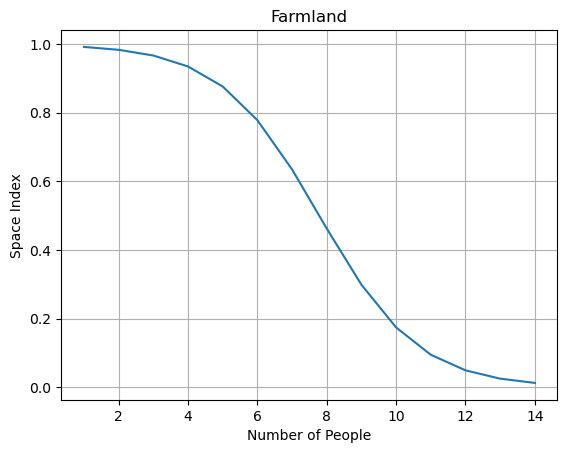

In [124]:
# FARM LAND
X = np.arange(1, 15, 1)
Y = np.array([get_space_index(floor_area_farmland, outside_area_farmland, x, population_density_farmland, space_for_pet) for x in X])

plt.grid()
plt.title("Farmland")
plt.xlabel("Number of People")
plt.ylabel("Space Index")
plt.plot(X,Y)


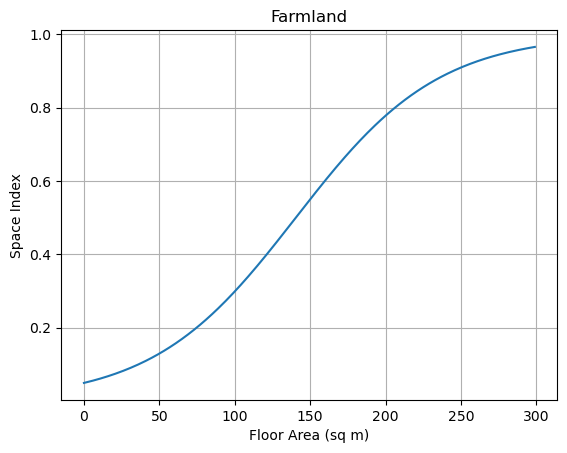

In [125]:
X = np.arange(0, 300, 1)
Y = np.array([get_space_index(x, 0, 1, population_density_farmland, space_for_pet) for x in X])

plt.grid()
plt.title("Farmland")
plt.xlabel("Floor Area (sq m)")
plt.ylabel("Space Index")
plt.plot(X,Y)

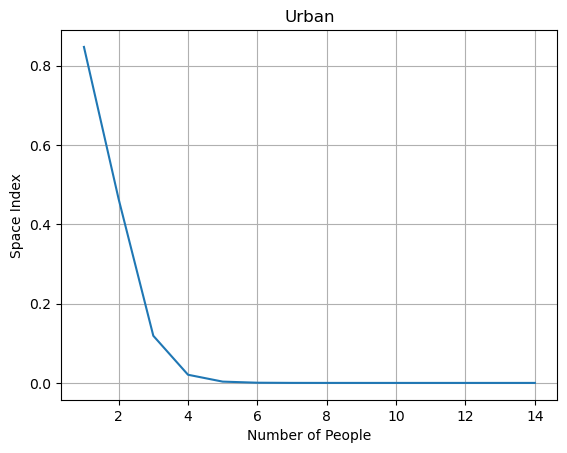

In [126]:
# def get_space_index_URBAN(floor_area, outside_area, people, space_for_pet = 2, neccesary_space = 10, space_per_person = 20):
   # ratio = get_space_ratio(floor_area, outside_area, people, space_for_pet, neccesary_space, space_per_person)
   # return 1/(1+math.exp(-0.2*(ratio-1)))

X = np.arange(1, 15, 1)
Y = np.array([get_space_index(floor_area_urban, outside_area_urban, x, population_density_urban, space_for_pet) for x in X])

plt.grid()
plt.title("Urban")
plt.xlabel("Number of People")
plt.ylabel("Space Index")
plt.plot(X,Y)

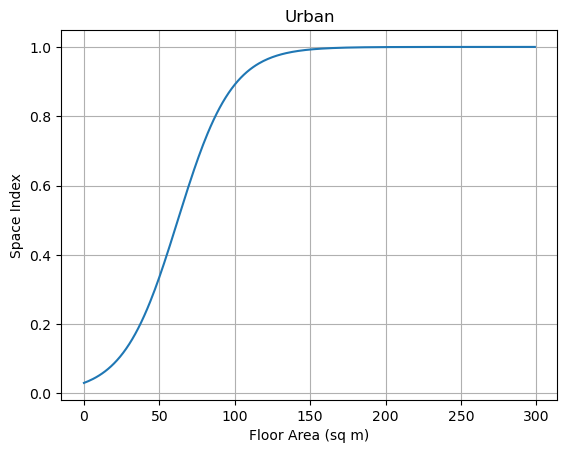

In [127]:
X = np.arange(0, 300, 1)
Y = np.array([get_space_index(x, 0, 1, population_density_urban, space_for_pet) for x in X])

plt.grid()
plt.title("Urban")
plt.xlabel("Floor Area (sq m)")
plt.ylabel("Space Index")
plt.plot(X,Y)

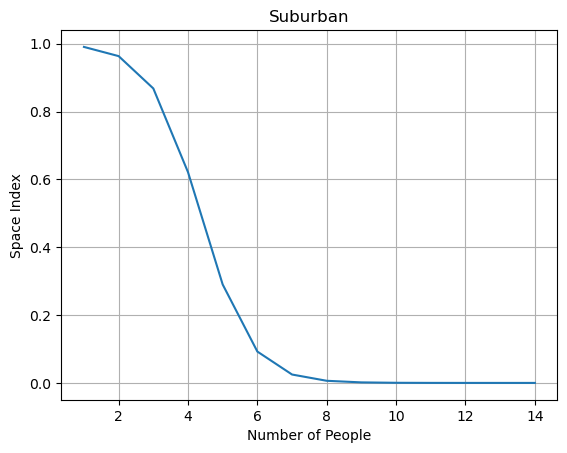

In [128]:
# def get_space_index_SUBURBAN(floor_area, outside_area, people, space_for_pet = 2, neccesary_space = 10, space_per_person = 20):
  #  ratio = get_space_ratio(floor_area, outside_area, people, space_for_pet, neccesary_space, space_per_person)
   # return 1/(1+math.exp(-0.115*(ratio-15)))

X = np.arange(1, 15, 1)
Y = np.array([get_space_index(floor_area_suburban, outside_area_suburban, x, population_density_suburban, space_for_pet) for x in X])

plt.grid()
plt.title("Suburban")
plt.xlabel("Number of People")
plt.ylabel("Space Index")
plt.plot(X,Y)

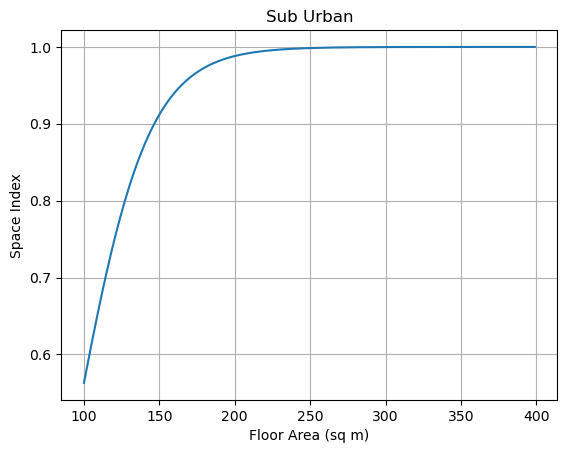

In [129]:
X = np.arange(100, 400, 1)
Y = np.array([get_space_index(x, 0, 1, population_density_suburban, space_for_pet) for x in X])

plt.grid()
plt.title("Sub Urban")
plt.xlabel("Floor Area (sq m)")
plt.ylabel("Space Index")
plt.plot(X,Y)

In [130]:
# ---- params ----

# income
income = 80 * 1_000
required_income = 75_000
income = 80 * 1_000

# space parameters
people = 3
outside_area = 600
floor_area = 300
pet_area = 2

# amount of time that can be spent on the pet
# std = 1
free_time = 5
pet_time = 2

In [131]:
income_index = get_income_index(income)
people_index = get_people_index(people)
time_index = get_time_index(free_time, pet_time)

income_index, people_index, time_index

TypeError: get_income_index() missing 2 required positional arguments: 'required_income' and 'steepness'

In [ ]:
fitness_index = 1/3 * income_index + 1/3 * people_index + 1/3 * time_index
fitness_index

0.7719625953011783

In [ ]:
def get_fitness_index(income, required_income, people, outside_area, floor_area, pet_area, free_time, pet_time):
    income_index = get_income_index_(income, required_income)
    space_index = get_space_index(floor_area, outside_area, people, pet_area)
    time_index = get_time_index(free_time, pet_time)

    return income_index, space_index, time_index

In [ ]:
F = get_fitness_index(income, required_income, people, outside_area, floor_area, pet_area, free_time, pet_time)
F

NameError: name 'get_income_index_' is not defined

In [ ]:
reduce(lambda x,y: x*y, F) ** (1/len(F))

0.8048574697980402

In [ ]:
F = get_fitness_index(67046, 37792, 1, 0, 80, 1.6, 5, 2)
F

(0.7631739352613004, 0.2465647929264015, 0.9986501019683699)

In [ ]:
reduce(lambda x,y: x*y, F) ** (1/len(F))

0.5727819380466975